In [230]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people# Import LWF Database

In [231]:
#Download and invoke dataset
##Download dataset to local and invoke it.
#min_faces_per_person means only pick the pictures which have the same label and quantity above 70.
#For example, bush picture has 80, then we can use it when choose the sampel. If lady gaga picture has 40, then the following data will not use it.
#resize means we shrink picture to 0.4 times orginal picture.
lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)

In [232]:
for k in lfw_people.keys():
    print(k)

data
images
target
target_names
DESCR


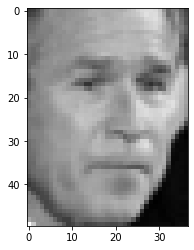

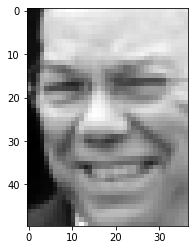

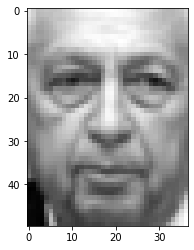

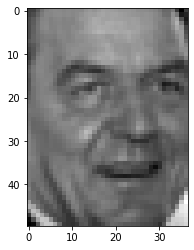

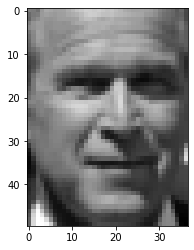

In [233]:
##first five images
for i in range(5):
    plt.imshow(lfw_people.images[i],cmap='gray')
    plt.show()

In [234]:
#Picture format
n_samples,h,w=lfw_people.images.shape
print(n_samples)
print(h)
print(w)

1217
50
37


In [235]:
lfw_people.data.shape

(1217, 1850)

In [236]:
lfw_people.data[0]

array([57.      , 60.333332, 73.333336, ..., 20.333334, 22.      ,
       20.333334], dtype=float32)

In [237]:
lfw_people.target

array([3, 1, 0, ..., 5, 3, 5], dtype=int64)

In [238]:
target_names=lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [239]:
##Train test split-70% for training, 30% for testing
x_train,x_test,y_train,y_test=train_test_split(lfw_people.data,lfw_people.target, test_size=0.3)

In [240]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (851, 1850)
x_test shape: (366, 1850)
y_train shape: (851,)
y_test shape: (366,)


### Support vector classifier svc

In [241]:
##Model definition kernel=rbf(defult=degree 3)
model=SVC(kernel='rbf',class_weight='balanced')
##Model training on x_train and y_train
model.fit(x_train,y_train)

C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [242]:
##Printing the precision,recall and f-1 score on test set 
predictions=model.predict(x_test)
print(classification_report(y_test,predictions,target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        18
     Colin Powell       0.00      0.00      0.00        85
  Donald Rumsfeld       0.00      0.00      0.00        35
    George W Bush       0.44      1.00      0.61       161
Gerhard Schroeder       0.00      0.00      0.00        29
       Tony Blair       0.00      0.00      0.00        38

         accuracy                           0.44       366
        macro avg       0.07      0.17      0.10       366
     weighted avg       0.19      0.44      0.27       366



C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [243]:
## trying to improve the results by dimensionality reduction

In [244]:
### Principal component analysis(PCA) Dimensionality Reduction

In [245]:
#100 Dimensionality
##
n_components=100
pca=PCA(n_components=n_components,whiten=True).fit(lfw_people.data)

x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [246]:
x_train_pca.shape

(851, 100)

In [247]:
model=SVC(kernel='rbf',class_weight='balanced')
model.fit(x_train_pca,y_train)

C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [248]:
predictions=model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.61      0.71        18
     Colin Powell       0.81      0.86      0.83        85
  Donald Rumsfeld       0.89      0.89      0.89        35
    George W Bush       0.90      0.93      0.91       161
Gerhard Schroeder       0.96      0.90      0.93        29
       Tony Blair       0.88      0.79      0.83        38

         accuracy                           0.88       366
        macro avg       0.88      0.83      0.85       366
     weighted avg       0.88      0.88      0.88       366



In [249]:
## Accuracy of 85% after dimensionality reduction to 100.

In [250]:
## trying  to improve our model by hyper parameter tuning

In [251]:
## Applying Grid search algorithm to find out the best parameter

In [252]:
param_grid={'C':[0.1,1,5,10,100],
            'gamma':[0.0005,0.001,0.005,0.01],}
model=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid)
model.fit(x_train_pca,y_train) 
print(model.best_estimator_)

C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [253]:
##Evaluation metrics:
predictions=model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.67      0.75        18
     Colin Powell       0.86      0.84      0.85        85
  Donald Rumsfeld       0.79      0.89      0.84        35
    George W Bush       0.91      0.94      0.92       161
Gerhard Schroeder       0.90      0.97      0.93        29
       Tony Blair       0.88      0.76      0.82        38

         accuracy                           0.88       366
        macro avg       0.87      0.84      0.85       366
     weighted avg       0.88      0.88      0.88       366



In [254]:
#Drawing, 3row4column
def plot_gallery(images,titles,h,w,n_row=3,n_col=5):
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

In [255]:
# Get first Picture title
def title(predictions,y_test,target_names,i):
    pred_name=target_names[predictions[i]].split(' ')[-1]
    true_name=target_names[y_test[i]].split(' ')[-1]
    return 'predicted:%s\ntrue:     %s' % (pred_name,true_name)

In [256]:
#Get All Picture title
prediction_titles=[title(predictions,y_test,target_names,i)for i in range(len(predictions))]

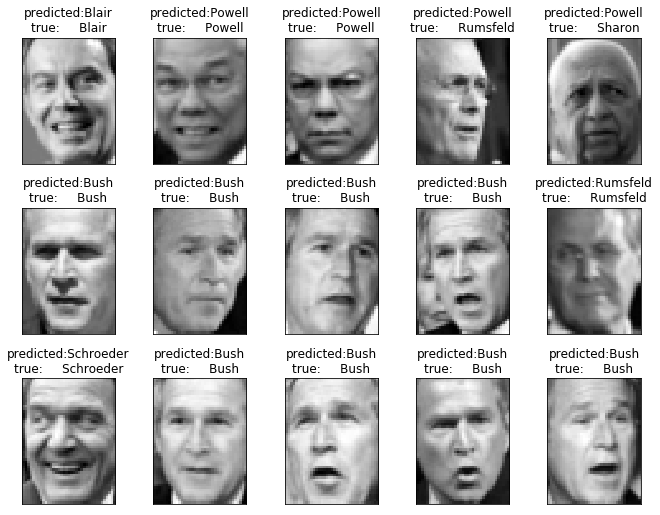

In [257]:
#Drawing
#Predictions
plot_gallery(x_test,prediction_titles,h,w)
plt.show()

In [258]:
## With the observation of above results: with the accuracy of almost 88% and f1-score of around 88%.
###Also, most pf the images are being predicted correctly,however afew images are not being predicted correctly.

### Preparing the data for MLP classifier
### Adding the 7th class of Dr Balaji

In [259]:

from PIL import Image
#import Image


In [260]:
lfw_people=fetch_lfw_people(min_faces_per_person=70,slice_ = (slice(61,189),slice(61,189)),resize=0.5)

In [261]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [262]:
lfw_people['target']
lfw_people['images'].shape

(1217, 64, 64)

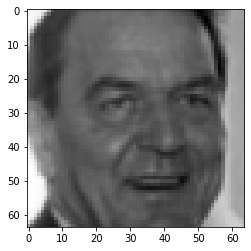

In [263]:
#imshow means show picture with following features
#images[6] meams shows 6th picture.
#camp means show picture as gray color
plt.imshow(lfw_people.images[3],cmap='gray')
plt.show()

In [264]:
#Picture format
#n_samples means we totally pick 1288 pictures that fit our demand.
#Picture's height is 50 and width is 37 also means height has 50 pixels and width has 37 pixels
n_samples,h,w=lfw_people.images.shape
print(n_samples)
print(h)
print(w)

1217
64
64


In [265]:
###Trying to add professor balaji's as one addes class,
###Images are downloaded from google

In [266]:
# local directory path to add images of professor balaji
path=r"C:\Users\sachi\Downloads\Pofbalaji"

In [267]:
import os
#preparing list of image paths
pro=[]
for i in os.listdir(path):
    pro.append(path+'\\'+i)

In [268]:
import cv2
import random
##Shuffling the image list randomly so that images are mixed in random order
random.shuffle(pro)

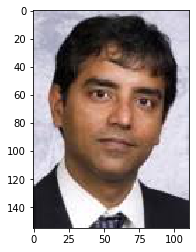

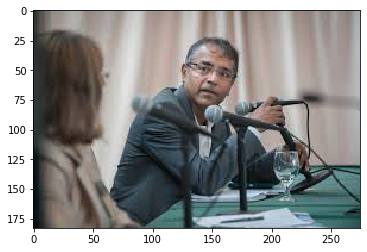

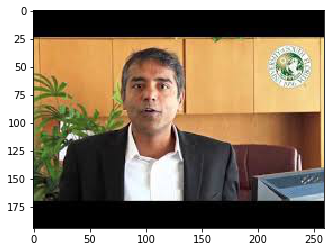

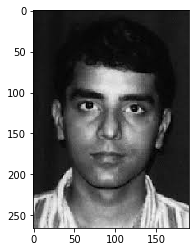

In [269]:
###Displying a few raw images of professor balaji
import matplotlib.image as pimg
import matplotlib.pyplot as plt
for image in pro[0:4]:
    img=pimg.imread(image )
    imgpl=plt.imshow(img)
    plt.show()

In [270]:
##Resizing the image and converting them to gray scale in order to use them in the CNN.

In [271]:
#Dimensions for resizing the images
n_r=64
n_c=64
ch=1

In [272]:
##Function to create features and labels for stratified sampling
##Resizing images to 64X64, ch=1(for gray scale)
##toring pixels of images in x and labelling the class to 6.
def process_image(images):
    x=[]
    y=[]
    for image in images:
        x.append(cv2.resize(cv2.imread(image,cv2.IMREAD_GRAYSCALE),(n_r,n_c),interpolation=cv2.INTER_LINEAR)) ##Resize##pixel values of images
        y.append(6)
    return x,y
       

In [273]:
x,y=process_image(pro)

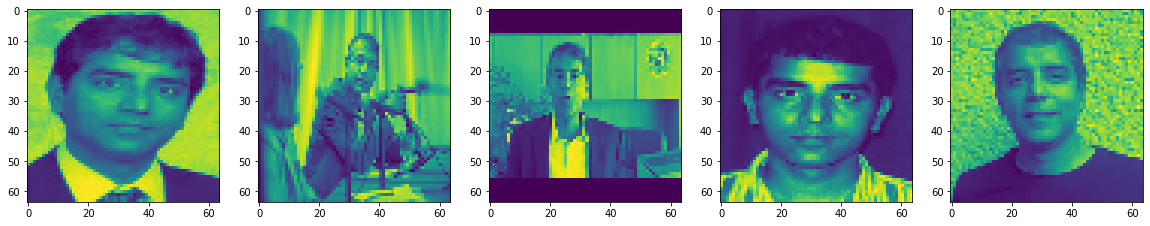

In [274]:
##Plotting the pixels stored in X
##Displaying the professor images after resizing:
##Pictures are equal in size 64X64 and in grayscale(ch=1)
plt.figure(figsize=(20,10))
c=5
for i in range(c):
    plt.subplot(5/c + 1, c, i+1)
    plt.imshow(x[i])

In [275]:
import numpy as np
##Converting to numpy array to use in cnn
X=np.array(x)
y=np.array(y)

In [276]:
##Reshaping to get compatible with other classe's data
X1=X.reshape(40,4096)

In [277]:
##Normalizing the pixel values to run on the model fast and efficient
X1=X1/255.0

In [278]:
X1.shape

(40, 4096)

In [279]:
y.shape

(40,)

In [280]:
len(X1)

40

In [281]:
type(lfw_people.data)

numpy.ndarray

In [282]:
###Normalizing the imported data set
lfw_people.data=lfw_people.data/255.0

In [283]:
### Adding professor's image pixels data to existing data set
lfw_people.data=np.vstack([lfw_people.data,X1])

In [284]:
type(y)

numpy.ndarray

In [285]:
lfw_people.data.shape

(1257, 4096)

In [286]:
lfw_people.target.shape

(1217,)

In [287]:
###Adding class 6 for professor's data in target variable
lfw_people.target=np.concatenate((lfw_people.target, y), axis=0)

In [288]:
lfw_people.target.shape

(1257,)

In [289]:
#spilt dataset 80/20
##Stratified split to keep the ratio same of all classes
#random_state means next run still select the same sample and sequence

x_train,x_test,y_train,y_test=train_test_split(lfw_people.data,lfw_people.target,test_size=0.2,random_state=42,stratify=lfw_people.target)

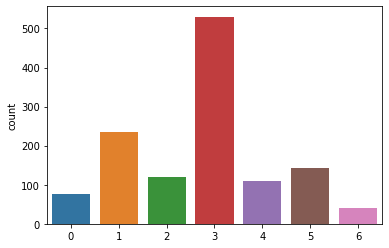

In [290]:
##After adding professor's image the data sets looks like this
import seaborn as sns
sns.countplot(lfw_people.target)

In [291]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1005, 4096)
(1005,)
(252, 4096)
(252,)


### Muliti Layer percepton classifier

In [292]:
x_train_mlp=x_train
y_train_mlp=y_train
x_test_mlp=x_test
y_test_mlp=y_test



In [293]:
##classes
names=['Ariel Sharon',
 'Colin Powell',
 'Donald Rumsfeld',
 'George W Bush',      
 'Gerhard Schroeder',
 'Tony Blair',
 'Dr Balaji']

In [294]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
###Model definition with 3 hidden layers with nodes 400, 300 and 200 respectively, and 1 input and 1 output layer is recognized by the model 
#based on the number of classes and input values
dnn_clf = MLPClassifier(hidden_layer_sizes=(400,300,200),
                       max_iter=500)
##Model training
dnn_clf.fit(x_train_mlp,y_train_mlp)
##Model prediction
y_pred=dnn_clf.predict(x_test_mlp)
##Model evaluation

print(accuracy_score(y_test,y_pred))

0.746031746031746


In [295]:
print("Shape of data:",lfw_people.data.shape)
print("Shape of target variable:",lfw_people.target.shape)

Shape of data: (1257, 4096)
Shape of target variable: (1257,)


In [296]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Convolutional neural network

In [297]:


# input image dimensions
img_rows, img_cols = 64, 64
input_shape=(64,64,1)
###Input shape(height,width,channel(gray scale=1))


In [298]:
x_train.shape[0]

1005

In [299]:
###Reshaping all the images in 4 dimension to utilize in input layer of cnn
img_rows, img_cols=64,64
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1, img_rows, img_cols)
    x_test = x_test.reshape(x_train.shape[0], 1, img_rows, img_cols)

else:
    type(x_train)
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#X_valid= X_valid.astype('float32')
#x_train /= 255
#x_test /= 255
#X_valid/=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1005, 64, 64, 1)
1005 train samples
252 test samples


In [300]:
print(y_train.shape)
print(y_test.shape)

(1005,)
(252,)


In [301]:
import tensorflow
from tensorflow.keras import utils

In [302]:
###Converting target variables in order to train the cnn multiclass
y_train = tensorflow.keras.utils.to_categorical(y_train, 7)
y_test = tensorflow.keras.utils.to_categorical(y_test, 7)

In [303]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [304]:
print(y_train.shape)
print(y_test.shape)

(1005, 7)
(252, 7)


### Model definition
### Sequencial layers stacked
### input layer CON2D with 32 filters, window size(3x3), padding=same
### Activation function relu=rectified linear unit-- 0 for negative values and value as it is for positive
### Max pooling to shrink the window size in order to reduce the complexity by reducing number of parameters.
### dropout: removes the weights for specified percentage of random layers, this helps in reducing the overfitting
### Flatten: to convert the data into one dimension
### Dense: inputs are connected to all the nodes.
### Softmax is used for multiclass classifiaction


In [305]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [306]:
###Using RMSprop optimizer after trying differerent optimizers
#from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              #optimizer=tensorflow.keras.optimizers.Adadelta(learning_rate=0.0001),
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [307]:
##Different optimizers
#opt = optimizers.Adam(lr=0.00001)
#opt=optimizers.RMSprop(lr=0.0001)
#opt=optimizers.Adadelta(lr=0.0001)
#opt=optimizers.SGD(lr=0.0001)


In [308]:
###Model training

epochs=100
batch_size=64
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/100
16/16 [==============================] - 8s 476ms/step - loss: 1.7170 - accuracy: 0.4080 - val_loss: 1.6869 - val_accuracy: 0.4206
Epoch 2/100
16/16 [==============================] - 8s 519ms/step - loss: 1.6613 - accuracy: 0.4219 - val_loss: 1.6859 - val_accuracy: 0.4206
Epoch 3/100
16/16 [==============================] - 10s 604ms/step - loss: 1.6623 - accuracy: 0.4219 - val_loss: 1.6888 - val_accuracy: 0.4206
Epoch 4/100
16/16 [==============================] - 11s 679ms/step - loss: 1.6484 - accuracy: 0.4219 - val_loss: 1.6859 - val_accuracy: 0.4206
Epoch 5/100
16/16 [==============================] - 12s 741ms/step - loss: 1.6494 - accuracy: 0.4219 - val_loss: 1.6841 - val_accuracy: 0.4206
Epoch 6/100
16/16 [==============================] - 11s 682ms/step - loss: 1.6472 - accuracy: 0.4219 - val_loss: 1.6870 - val_accuracy: 0.4206
Epoch 7/100
16/16 [==============================] - 10s 622ms/step - loss: 1.6298 - accuracy: 0.4229 - val_loss: 1.6877 - val_accuracy: 0

Epoch 58/100
16/16 [==============================] - 8s 529ms/step - loss: 0.4213 - accuracy: 0.8507 - val_loss: 0.4052 - val_accuracy: 0.8770
Epoch 59/100
16/16 [==============================] - 9s 582ms/step - loss: 0.4464 - accuracy: 0.8527 - val_loss: 0.4447 - val_accuracy: 0.8532
Epoch 60/100
16/16 [==============================] - 10s 596ms/step - loss: 0.4259 - accuracy: 0.8458 - val_loss: 0.3759 - val_accuracy: 0.8810
Epoch 61/100
16/16 [==============================] - 9s 556ms/step - loss: 0.3987 - accuracy: 0.8507 - val_loss: 0.3526 - val_accuracy: 0.9048
Epoch 62/100
16/16 [==============================] - 9s 571ms/step - loss: 0.3962 - accuracy: 0.8597 - val_loss: 0.3790 - val_accuracy: 0.8968
Epoch 63/100
16/16 [==============================] - 9s 592ms/step - loss: 0.3555 - accuracy: 0.8756 - val_loss: 0.3478 - val_accuracy: 0.9048
Epoch 64/100
16/16 [==============================] - 10s 612ms/step - loss: 0.3714 - accuracy: 0.8677 - val_loss: 0.3581 - val_accurac

Learning curve:

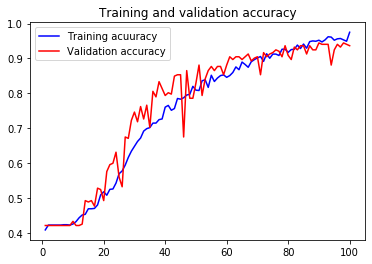

In [309]:
a=history.history['accuracy']
v_a=history.history['val_accuracy']
l=history.history['loss']
v_l=history.history['val_loss']
e=range(1,len(a)+1)
plt.plot(e,a,'b',label="Training acuuracy")
plt.plot(e,v_a,'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

By looking at the accuracy learning curve, it seems after certain values curve is flattened, that expalins the model can not to be improved with the current data set.

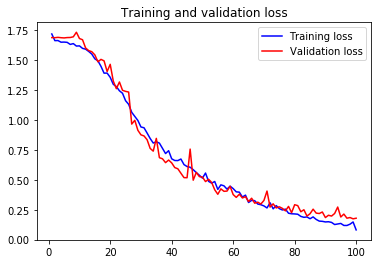

In [310]:
plt.plot(e,l,'b',label="Training loss")
plt.plot(e,v_l,'r',label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

By looking at the accuracy learning curve, it seems after certain values curve is flattened, that expalins the model can not to be improved with the current data set.

In [311]:
pred_test=np.round(model.predict(x_test))

In [312]:
names=['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush','Gerhard Schroeder', 'Tony Blair','Dr Balaji']

In [313]:
import sklearn
from sklearn.metrics import classification_report

In [314]:
classification_metric=sklearn.metrics.classification_report(y_test,pred_test,target_names=names)

C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [315]:
print(classification_metric)

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.88      0.93        16
     Colin Powell       0.94      1.00      0.97        47
  Donald Rumsfeld       0.82      0.96      0.88        24
    George W Bush       0.97      0.96      0.97       106
Gerhard Schroeder       1.00      0.68      0.81        22
       Tony Blair       1.00      0.83      0.91        29
        Dr Balaji       0.89      1.00      0.94         8

        micro avg       0.95      0.92      0.94       252
        macro avg       0.95      0.90      0.92       252
     weighted avg       0.96      0.92      0.94       252
      samples avg       0.92      0.92      0.92       252



In [316]:
### looking at the above precision, recal and f-1 score we can say that some is trained well to predict most of the images

In [317]:
import pandas as pd

In [318]:
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(pred_test).idxmax(axis=1)

In [319]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [320]:
print(confusion_matrix)

[[ 14   1   1   0   0   0   0]
 [  0  47   0   0   0   0   0]
 [  1   0  23   0   0   0   0]
 [  1   1   2 102   0   0   0]
 [  3   1   2   1  15   0   0]
 [  2   0   0   2   0  24   1]
 [  0   0   0   0   0   0   8]]


In [321]:
import itertools

In [322]:
##refrence stack overflow
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',
cmap=plt.cm.Blues):
 
#Normalization Option

   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

Confusion matrix, without normalization


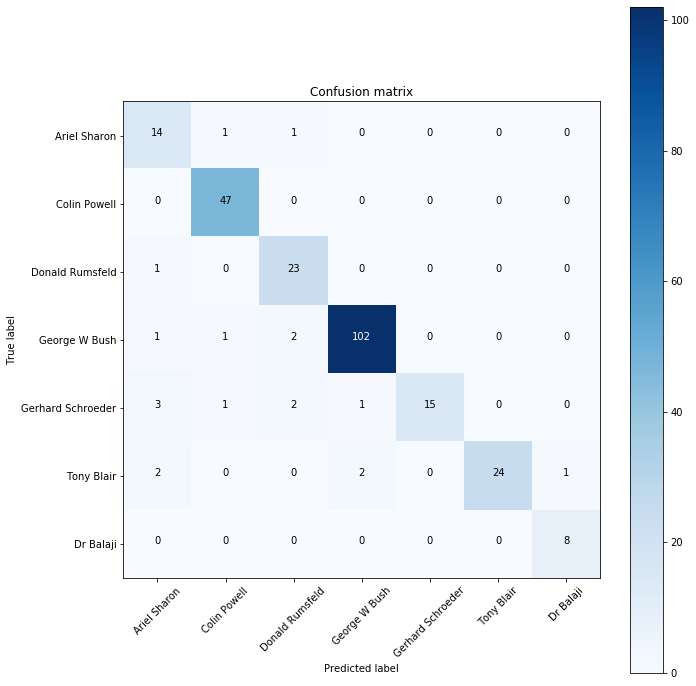

In [323]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(confusion_matrix,names,normalize=False)

In [328]:
### After looking at the confusion matrix,it is evident that we are getting true positive values for most of the predictions
###Except ariel sharon
### Data set is not even so model is trained to predict geroge bush better than tony blair as it has more true positives.

In [329]:
##Testing

In [330]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.preprocessing import image

In [331]:
### Testing image
       

In [332]:
### Conversion of test images to pixels
###Resizing  to be used in model
###Refrence stack overflow

n_r=64
n_c=64
#file_path=""
z=[]
def read_image(file_path):
    image_t=cv2.resize(cv2.imread(file_path,cv2.IMREAD_GRAYSCALE),(64,64),interpolation=cv2.INTER_LINEAR)
    z.append(image_t)
    image_t=np.array(z)
    if K.image_data_format() == 'channels_first':
        image_t=z.reshape(image_t.shape[0],1, img_rows, img_cols)
    else:
        image_t=image_t.reshape(image_t.shape[0], img_rows, img_cols,1)
    image_t = image_t.astype('float32')
    image_t/=255
    return image_t


In [333]:
###Refrence stack overflow
def test_single_image(path):
  #animals = [‘butterflies’, ‘chickens’, ‘elephants’, ‘horses’, ‘spiders’, ‘squirells’]
  names=['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush','Gerhard Schroeder', 'Tony Blair','Dr Balaji']
  images = read_image(path)

 # time.sleep(.5)
  #bt_prediction = vgg16.predict(images) 
 # preds = model.predict_proba(bt_prediction)
  bt_prediction = model.predict_proba(images)
  #print(bt_prediction)
  preds = model.predict(images)
  #print(np.argmax(preds[]))
  top=np.argmax(bt_prediction[0])
  
  print(names[top])
  print("Probability:",(bt_prediction[0][top])*100)

  return load_img(path)

In [334]:
#path=r"C:\Users\sachi\Downloads\image_prof.jfif"
#path=r"C:\Users\sachi\Downloads\george1.jpg"
#path=r"C:\Users\sachi\Downloads\Pofbalaji\images.jfif"


In [335]:
path

'C:\\Users\\sachi\\Downloads\\Pofbalaji'

Dr Balaji
Probability: 99.99933242797852


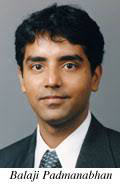

In [336]:
path=r"C:\Users\sachi\Downloads\image_prof.jfif"
test_single_image(path)

In [209]:
#### To summarize
### We have best results from Convolutional neural network.